In [95]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
# https://www.kaggle.com/heart_datasetsets/johnsmith88/heart-disease-heart_datasetset
heart_dataset = pd.read_csv("dataset/heart.csv")
    # age
    # sex
    # chest pain type (4 values)
    # resting blood pressure
    # serum cholestoral in mg/dl
    # fasting blood sugar > 120 mg/dl
    # resting electrocardiographic results (values 0,1,2)
    # maximum heart rate achieved
    # exercise induced angina
    # oldpeak = ST depression induced by exercise relative to rest
    # the slope of the peak exercise ST segment
    # number of major vessels (0-3) colored by flourosopy
    # thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    # The names and social security numbers of the patients were recently removed from the heart_datasetbase, replaced with dummy values.

    #  "cp": "chest_pain_type",
    #  "trestbps": "resting_bp",
    #  "chol": "cholesterol",
    # "fbs": "fasting_blood_sugar",
    #  "restecg": "rest_ecg",
    #  "thalach": "max_heart_rate",
    #  "exang": "exercise_angina",
    #  "oldpeak": "st_depression",
    #  "slope": "st_slope",
    #  "ca": "major_vessels",
    # "thal": "thalassemia"

In [74]:
heart_dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [75]:
# formatting column names
heart_dataset.columns = [col.lower().replace(' ', '_') for col in heart_dataset.columns]

In [76]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [77]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [78]:
print(heart_dataset)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [80]:
# Convert non-numeric heart_dataset to numeric heart_dataset
le = LabelEncoder()
heart_dataset['sex'] = le.fit_transform(heart_dataset['sex'])
heart_dataset['cp'] = le.fit_transform(heart_dataset['cp'])
heart_dataset['fbs'] = le.fit_transform(heart_dataset['fbs'])
heart_dataset['restecg'] = le.fit_transform(heart_dataset['restecg'])
heart_dataset['exang'] = le.fit_transform(heart_dataset['exang'])
heart_dataset['slope'] = le.fit_transform(heart_dataset['slope'])
heart_dataset['thal'] = le.fit_transform(heart_dataset['thal'])
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [82]:
X=heart_dataset.drop(['target'], axis =1)
y=heart_dataset['target']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [89]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [100]:
# accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

# Convert accuracy score to percentage format
formatted_accuracy = "{:.2%}".format(test_data_accuracy)

print(f'Accuracy score of the testing data: {formatted_accuracy}')

Accuracy score of the testing data: 98.54%


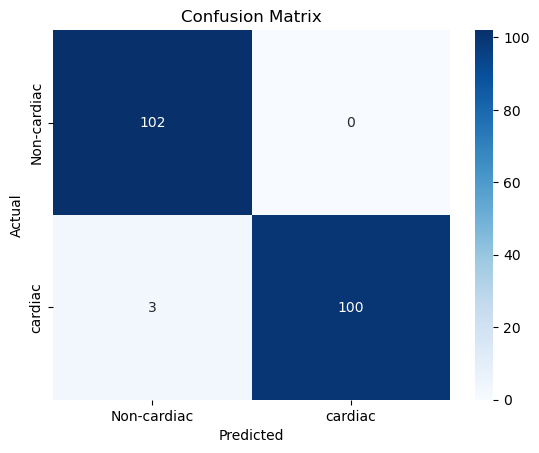

In [102]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, X_test_prediction)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Non-cardiac', 'cardiac'], 
            yticklabels=['Non-cardiac', 'cardiac'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [104]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [106]:
heart_dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [108]:
import pandas as pd
import numpy as np

# Define the input data
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

# Define the column names
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Create a DataFrame
input_data_df = pd.DataFrame([input_data], columns=columns)


In [109]:
# Assuming 'model' is your trained DecisionTreeClassifier
prediction = model.predict(input_data_df)

# Output the prediction
if prediction[0] == 0:
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')


The person does not have heart disease.


In [113]:
import pickle
filename = 'model/heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))